In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv('clustering.csv')
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


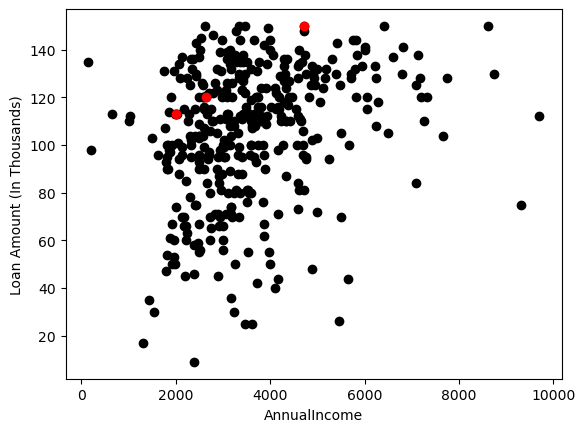

In [9]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
#print(Centroids)
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [53]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

0.0


/tmp/ipykernel_559505/3142618123.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
/tmp/ipykernel_559505/3142618123.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
/tmp/ipykernel_559505/3142618123.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroi

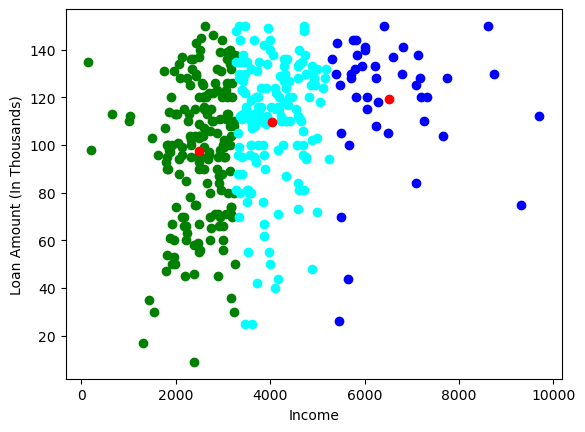

In [12]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

### SKlearn

In [13]:
from sklearn.cluster import KMeans
import numpy as np

In [19]:
# Convert the dataframe values to numpy array
data = X[["ApplicantIncome","LoanAmount"]].to_numpy()
print(data)

[[4.583e+03 1.280e+02]
 [3.000e+03 6.600e+01]
 [2.583e+03 1.200e+02]
 [6.000e+03 1.410e+02]
 [2.333e+03 9.500e+01]
 [3.200e+03 7.000e+01]
 [2.500e+03 1.090e+02]
 [1.853e+03 1.140e+02]
 [1.299e+03 1.700e+01]
 [4.950e+03 1.250e+02]
 [3.596e+03 1.000e+02]
 [3.510e+03 7.600e+01]
 [4.887e+03 1.330e+02]
 [2.600e+03 1.150e+02]
 [7.660e+03 1.040e+02]
 [2.600e+03 1.160e+02]
 [3.365e+03 1.120e+02]
 [2.799e+03 1.220e+02]
 [4.226e+03 1.100e+02]
 [1.442e+03 3.500e+01]
 [3.750e+03 1.200e+02]
 [3.167e+03 7.400e+01]
 [4.692e+03 1.060e+02]
 [3.500e+03 1.140e+02]
 [1.828e+03 1.000e+02]
 [3.667e+03 1.440e+02]
 [3.748e+03 1.100e+02]
 [3.600e+03 8.000e+01]
 [1.800e+03 4.700e+01]
 [2.400e+03 7.500e+01]
 [3.941e+03 1.340e+02]
 [4.695e+03 9.600e+01]
 [3.410e+03 8.800e+01]
 [5.649e+03 4.400e+01]
 [5.821e+03 1.440e+02]
 [2.645e+03 1.200e+02]
 [4.000e+03 1.440e+02]
 [1.928e+03 1.000e+02]
 [3.086e+03 1.200e+02]
 [4.230e+03 1.120e+02]
 [4.616e+03 1.340e+02]
 [2.708e+03 9.700e+01]
 [2.132e+03 9.600e+01]
 [3.366e+03

In [20]:
#KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, 
#       copy_x=True, algorithm='lloyd')
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data)

In [22]:
kmeans.cluster_centers_

array([[2506.41304348,   97.58695652],
       [4043.45454545,  109.77922078],
       [6512.76744186,  119.48837209]])

In [34]:
print(len(kmeans.labels_))
kmeans.labels_

381


array([1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1,

In [26]:
kmeans.predict([[100, 100], [120, 300]])

array([0, 0], dtype=int32)

In [45]:
data[kmeans.labels_==0][:,0]

array([3000., 2583., 2333., 3200., 2500., 1853., 1299., 2600., 2600.,
       2799., 1442., 3167., 1828., 1800., 2400., 2645., 1928., 3086.,
       2708., 2132., 2500., 3029., 3200., 1875., 1000., 2366., 2500.,
       2958., 3273., 2484., 1977., 1759., 3052., 2071., 2929., 2214.,
       2137., 2957., 2014., 2718., 2698., 2330., 1538., 2281., 3254.,
       2980., 1863., 3089., 2439., 2237., 1820., 2045., 2333., 1916.,
       2178., 2383., 1907., 2600., 3244., 2479., 3173.,  150., 2221.,
       2971., 2491., 3189., 3155., 2510., 2882., 1809., 2583., 2060.,
       2876., 3237., 2833., 2620., 2750., 3103., 2301., 1811., 3158.,
       2600., 3075., 3153., 2014., 1800., 2875., 1625., 2400., 2917.,
       2927., 2507., 2058., 2400., 3166., 2500., 2935., 2833., 2378.,
       3173., 2583., 3083., 2666., 2423., 3000., 3013., 2500., 3062.,
       2764., 3069., 2346., 2333., 2583., 1993., 3100., 3180., 3033.,
       1500., 2889., 2755., 2500., 1963., 2167., 2213., 2253., 2995.,
       1025., 3246.,

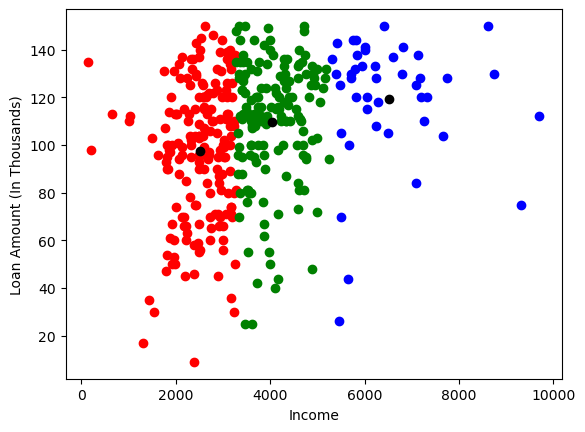

In [49]:
K = 3
centroids = kmeans.cluster_centers_
color = ['red', 'green', 'blue']
for i in range(K):
    plt.scatter(data[kmeans.labels_==i][:,0],data[kmeans.labels_==i][:,1],c=color[i])
    plt.scatter(centroids[i,0],centroids[i,1], c='black')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()